In [1]:
import pandas as pd

df = pd.read_csv("/content/Life Expectancy Data.csv")
df[:10]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [2]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
def map_categorical_to_numerical(categorical_data):
    unique_categories = set(categorical_data)
    mapping = {category: i for i, category in enumerate(unique_categories)}
    return mapping

In [6]:
country_numerical=map_categorical_to_numerical(df['Country'])
status_numerical=map_categorical_to_numerical(df['Status'])

In [7]:
import numpy as np

new_country = np.array([])
new_status = np.array([])

for country in df['Country']:
  new_country = np.append(new_country,country_numerical[country])
for status in df['Status']:
  new_status = np.append(new_status,status_numerical[status])

new_country[:3],new_status[:3]


(array([66., 66., 66.]), array([1., 1., 1.]))

In [8]:
df = df.drop("Country",axis=1)
df = df.drop("Status",axis=1)

df["Country"] = new_country
df['Status'] = new_status

df[:3]

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Country,Status
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,66.0,1.0
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,66.0,1.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,66.0,1.0


In [9]:
df = df.fillna(df.mean())

In [10]:
df.isnull().sum()

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Country                            0
Status                             0
dtype: int64

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_normalize = ['Country', 'Year', 'Status','Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

In [12]:
y = df["Life expectancy "]
X = df.drop("Life expectancy ",axis=1)

X.shape, y.shape

((2938, 21), (2938,))

In [13]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [16]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
              metrics = ["mse"])

model.fit(X_train,y_train,
          epochs=200,
          verbose=1)

Epoch 1/200
65/65 [==============================] - 3s 3ms/step - loss: 29.9548 - mse: 1547.5558
Epoch 2/200
65/65 [==============================] - 0s 4ms/step - loss: 6.3362 - mse: 68.8140
Epoch 3/200
65/65 [==============================] - 0s 3ms/step - loss: 5.7138 - mse: 56.8711
Epoch 4/200
65/65 [==============================] - 0s 3ms/step - loss: 5.2418 - mse: 47.7822
Epoch 5/200
65/65 [==============================] - 0s 3ms/step - loss: 4.9226 - mse: 42.1973
Epoch 6/200
65/65 [==============================] - 0s 3ms/step - loss: 4.5297 - mse: 35.8276
Epoch 7/200
65/65 [==============================] - 0s 3ms/step - loss: 4.3059 - mse: 33.5474
Epoch 8/200
65/65 [==============================] - 0s 3ms/step - loss: 4.1077 - mse: 30.8379
Epoch 9/200
65/65 [==============================] - 0s 3ms/step - loss: 3.9060 - mse: 28.3046
Epoch 10/200
65/65 [==============================] - 0s 3ms/step - loss: 3.5763 - mse: 25.0068
Epoch 11/200
65/65 [==========================

28/28 [==============================] - 0s 4ms/step


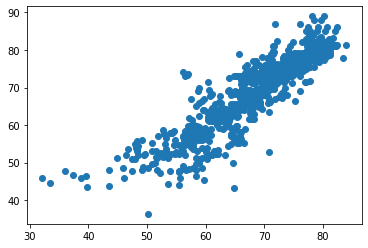

In [18]:
import matplotlib.pyplot as plt

y_preds = model.predict(X_test)
plt.scatter(y_preds,y_test)